# Adam's Failure to Converge in Simple 1-Dim Convex Settings

The proposed Loss function that shows Adam fails to converge for a simple one dimensional convex setting is as follows:

$f_t(x)=
\begin{cases}
Cx, & \text{for $t$ mod 3 = 1} \\
-x, & \text{otherwise}
\end{cases}$

such that $C$ is a constant.

This suggests for every three iterations, the loss function is defined as $Cx$ and for all other iterations is defined as $-x$. It is clear that the optimal value for this piece wise function is $-1$. This notebook, which is mostly taken from Vitaly Bushaev's Medium article, [Adam — latest trends in deep learning optimization](https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c), shows that Adam performs very similarly to AMSGrad when the hyperparamters $(\beta_1, \beta_2)$ are set to what is suggested in the paper that proposed Adam. However, when the hyperparameters are set NOT as suggested, Adam fails to converge to the solution.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [2]:
# We don't the need the loss function, just need the gradient
def grad_determ(x, C=15):
    if x % 3 == 1:
        return C
    else:
        return -1

In [3]:
# We look at values in [-1, 1]
def project(x):
    if -1 <= x <= 1:
        return x
    elif x <= -1:
        return -1
    else:
        return 1

In [4]:
# Some Hyper Parameters for the notebook
num_iterations = 10000
C = 15

## Stochastic Gradient Descent 

In [5]:
def stochastic_gd(num_iterations, starting_x, eta, C, grad_func):

    grad_type = str(grad_func).split()[1]
    x = starting_x
    lr = eta
    
    x_list = []
    for t in range(num_iterations):
        if grad_type == 'grad_determ':
            g_t = grad_func(t, C)
        else:
            g_t = grad_func(C)
        x = project(x - lr * g_t)
        x_list.append(x)
        
    return round(x, 4), x_list

In [6]:
sgd_x_last, sgd_x_list = stochastic_gd(num_iterations=num_iterations, 
                                       starting_x=0, 
                                       eta=0.0001, 
                                       C=15, 
                                       grad_func=grad_determ)

In [7]:
sgd_x_last

-0.9998

## Adam

Note, that with default values beta_1 = 0.9 and beta_2 = 0.999 Adam converges to -1 for this exact example with C = 15.
Large values of epsilon (>100) also gets Adam to converge to optimal point -1

In [8]:
m_t = 0
v_t = 0
epsilon = 1e-7
x = 0
beta_1 = 0.0
beta_2 = 1 / (1 + C * C )
# beta_1 = 0.9
# beta_2 = .999
step_size = 0.1
v_hat = 0

In [9]:
def adam_gd(num_iterations, starting_x, eta, C, beta_1, beta_2, epsilon, grad_func):
    
    grad_type = str(grad_func).split()[1]
    
    x = starting_x
    step_size = eta
    
    m_t = 0
    v_t = 0
    x_list = []
    for t in range(num_iterations):
        if grad_type == 'grad_determ':
            g_t = grad_func(t, C)
        else:
            g_t = grad_func(C)

#         g_t = grad_determ(t, C)
        m_t = beta_1 * m_t + (1 - beta_1) * g_t
        v_t = beta_2 * v_t + (1 - beta_2) * (g_t * g_t)
        m_hat = m_t / (1 - np.power(beta_1, t + 1))
        v_hat = v_t / (1 - np.power(beta_2, t + 1))

        x = project(x - step_size * m_hat / (v_hat + epsilon))
        x_list.append(x)
        
    return x, x_list

### Example of Adam NOT Converging

In [10]:
adam_x_last, adam_x_list = adam_gd(num_iterations=num_iterations, 
                                   starting_x=0, 
                                   eta=.1, 
                                   C=15, 
                                   beta_1=beta_1, 
                                   beta_2=beta_2, 
                                   epsilon=epsilon, 
                                   grad_func=grad_determ)

In [11]:
adam_x_last

1

## AMSGRAD

In [12]:
m_t = 0
v_t = 0
epsilon = 1e-7
x = 0
beta_1 = 0.0
beta_2 = 1 / (1 + C * C )
# beta_1 = 0.9
# beta_2 = .999
step_size = 0.1
v_hat = 0

In [13]:
def amsgrad_gd(num_iterations, starting_x, eta, C, beta_1, beta_2, v_hat, epsilon, grad_func):
    
    grad_type = str(grad_func).split()[1]
    
    x = starting_x
    step_size = eta
    
    m_t = 0
    v_t = 0
    x_list = []
    for t in range(num_iterations):
        
        if grad_type == 'grad_determ':
            g_t = grad_func(t, C)
        else:
            g_t = grad_func(C)

#         g_t = grad_func(t, C)
        m_t = beta_1 * m_t + (1 - beta_1) * g_t
        v_t = beta_2 * v_t + (1 - beta_2) * (g_t * g_t)
        v_hat = np.maximum(v_hat, v_t)

        x = project(x - step_size * m_t / (v_hat + epsilon))
        x_list.append(x)
    return x, x_list

### Example of AMS Grad Converging

In [14]:
ams_x_last, ams_x_list = amsgrad_gd(num_iterations=num_iterations, 
                                      starting_x=0, 
                                      eta=step_size, 
                                      C=15, 
                                      beta_1=beta_1, 
                                      beta_2=beta_2, 
                                      v_hat=0, 
                                      epsilon=1e-7, 
                                      grad_func=grad_determ)

In [15]:
ams_x_last

-0.9991071782072143

## Plotting

Selecting Hyperparamters NOT as recommended

In [16]:
# NOT Suggested Hyperparameters

m_t = 0
v_t = 0
epsilon = 1e-7
x = 0
beta_1 = 0.0
beta_2 = 1 / (1 + C * C )
# beta_1 = 0.9
# beta_2 = .999
step_size = 0.1
v_hat = 0

In [17]:
sgd_x_last_determ_bad, sgd_x_list_determ_bad = stochastic_gd(num_iterations=num_iterations, 
                                                             starting_x=x, 
                                                             eta=0.0001, 
                                                             C=C, 
                                                             grad_func=grad_determ)

adam_x_lat_determ_bad, adam_x_list_determ_bad = adam_gd(num_iterations=num_iterations, 
                                                        starting_x=x, 
                                                        eta=step_size, 
                                                        C=C, 
                                                        beta_1=beta_1, 
                                                        beta_2=beta_2, 
                                                        epsilon=epsilon, 
                                                        grad_func=grad_determ)

ams_x_last_determ_bad, ams_x_list_determ_bad = amsgrad_gd(num_iterations=num_iterations, 
                                                          starting_x=x, 
                                                          eta=step_size, 
                                                          C=C, 
                                                          beta_1=beta_1, 
                                                          beta_2=beta_2, 
                                                          v_hat=0, 
                                                          epsilon=epsilon, 
                                                          grad_func=grad_determ)

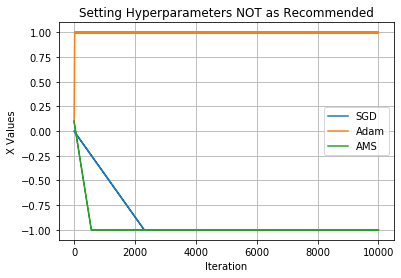

In [18]:
plt.plot(sgd_x_list_determ_bad, label='SGD')
plt.plot(adam_x_list_determ_bad, label='Adam')
plt.plot(ams_x_list_determ_bad, label='AMS')
plt.xlabel('Iteration')
plt.ylabel('X Values')
plt.legend()
plt.title('Setting Hyperparameters NOT as Recommended')
plt.grid(True)

Selecting Hyperparamters AS recommended

In [19]:
# Suggested Hyperparameters
m_t = 0
v_t = 0
epsilon = 1e-7
x = 0
# beta_1 = 0.0
# beta_2 = 1 / (1 + C * C )
beta_1 = 0.9
beta_2 = .999
step_size = 0.1
v_hat = 0
C = 15

In [20]:
sgd_x_last_determ_good, sgd_x_list_determ_good = stochastic_gd(num_iterations=num_iterations, 
                                                               starting_x=x, 
                                                               eta=0.0001, 
                                                               C=C, 
                                                               grad_func=grad_determ)

adam_x_lat_determ_good, adam_x_list_determ_good = adam_gd(num_iterations=num_iterations, 
                                                          starting_x=x, 
                                                          eta=step_size, 
                                                          C=C, 
                                                          beta_1=beta_1, 
                                                          beta_2=beta_2, 
                                                          epsilon=epsilon, 
                                                          grad_func=grad_determ)

ams_x_last_determ_good, ams_x_list_determ_good = amsgrad_gd(num_iterations=num_iterations, 
                                                            starting_x=x, 
                                                            eta=step_size, 
                                                            C=C, 
                                                            beta_1=beta_1, 
                                                            beta_2=beta_2, 
                                                            v_hat=0, 
                                                            epsilon=epsilon, 
                                                            grad_func=grad_determ)

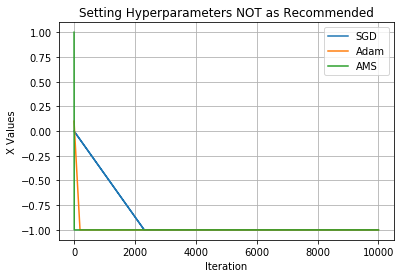

In [21]:
plt.plot(sgd_x_list_determ_good, label='SGD')
plt.plot(adam_x_list_determ_good, label='Adam')
plt.plot(ams_x_list_determ_good, label='AMS')
plt.xlabel('Iteration')
plt.ylabel('X Values')
plt.legend()
plt.title('Setting Hyperparameters NOT as Recommended')
plt.grid(True)

# Change the Loss Function to be Random Not Deterministic

In [22]:
# We don't actually need the function, we just need its gradient
def grad_random(C=15):
    
    rand_int = random.randint(1, 2)
    
    if rand_int > 1:
        return C
    else:
        return -1

In [23]:
num_iterations = 10000
C = 15

## Stochastic gradient descent 
### converges to optimal value of -1

In [24]:
sgd_x_last, sgd_x_list = stochastic_gd(num_iterations=num_iterations, 
                                       starting_x=0, 
                                       eta=0.0001, 
                                       C=15, 
                                       grad_func=grad_random)

In [25]:
sgd_x_last

-0.9999

## Adam
### With specific values of beta_1 and beta_2
### converges to sub-optimal point of 1

Note, that with default values beta_1 = 0.9 and beta_2 = 0.999 Adam converges to -1 for this exact example with C = 15.
Large values of epsilon (>100) also gets Adam to converge to optimal point -1

In [26]:
# beta_1 = 0.9
# beta_2 = .999

In [27]:
m_t = 0
v_t = 0
epsilon = 1e-7
x = 0
beta_1 = 0.0
beta_2 = 1 / (1 + C * C )
# beta_1 = 0.9
# beta_2 = .999
step_size = 0.1
v_hat = 0

In [28]:
adam_x_last, adam_x_list = adam_gd(num_iterations=num_iterations, 
                                   starting_x=0, 
                                   eta=.1, 
                                   C=15, 
                                   beta_1=beta_1, 
                                   beta_2=beta_2, 
                                   epsilon=epsilon, 
                                   grad_func=grad_random)

In [29]:
adam_x_last

1

## AMSGRAD converges to optimal point

In [30]:
m_t = 0
v_t = 0
epsilon = 1e-7
x = 0
beta_1 = 0.0
beta_2 = 1 / (1 + C * C )
# beta_1 = 0.9
# beta_2 = .999
step_size = 0.1
v_hat = 0

In [31]:
ams_x_last, ams_x_list = amsgrad_gd(num_iterations=num_iterations, 
                                    starting_x=0, 
                                    eta=step_size, 
                                    C=15, 
                                    beta_1=beta_1, 
                                    beta_2=beta_2, 
                                    v_hat=0, 
                                    epsilon=1e-7, 
                                    grad_func=grad_random)

In [32]:
ams_x_last

-0.999555555555753

## Plotting

Selecting Hyperparamters NOT as recommended

In [33]:
# NOT Suggested Hyperparameters

m_t = 0
v_t = 0
epsilon = 1e-7
x = 0
beta_1 = 0.0
beta_2 = 1 / (1 + C * C )
# beta_1 = 0.9
# beta_2 = .999
step_size = 0.1
v_hat = 0

In [34]:
sgd_x_last_rand_bad, sgd_x_list_rand_bad = stochastic_gd(num_iterations=num_iterations, 
                                                         starting_x=x, 
                                                         eta=0.0001, 
                                                         C=C, 
                                                         grad_func=grad_random)

adam_x_lat_rand_bad, adam_x_list_rand_bad = adam_gd(num_iterations=num_iterations, 
                                                    starting_x=x, 
                                                    eta=step_size, 
                                                    C=C, 
                                                    beta_1=beta_1, 
                                                    beta_2=beta_2, 
                                                    epsilon=epsilon, 
                                                    grad_func=grad_random)

ams_x_last_rand_bad, ams_x_list_rand_bad = amsgrad_gd(num_iterations=num_iterations, 
                                                      starting_x=x, 
                                                      eta=step_size, 
                                                      C=C, 
                                                      beta_1=beta_1, 
                                                      beta_2=beta_2, 
                                                      v_hat=0, 
                                                      epsilon=epsilon, 
                                                      grad_func=grad_random)

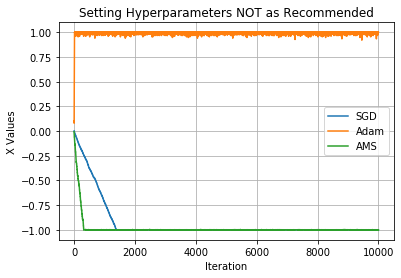

In [35]:
plt.plot(sgd_x_list_rand_bad, label='SGD')
plt.plot(adam_x_list_rand_bad, label='Adam')
plt.plot(ams_x_list_rand_bad, label='AMS')
plt.xlabel('Iteration')
plt.ylabel('X Values')
plt.legend()
plt.title('Setting Hyperparameters NOT as Recommended')
plt.grid(True)

Selecting Hyperparamters AS recommended

In [36]:
# Suggested Hyperparameters
m_t = 0
v_t = 0
epsilon = 1e-7
x = 0
# beta_1 = 0.0
# beta_2 = 1 / (1 + C * C )
beta_1 = 0.9
beta_2 = .999
step_size = 0.1
v_hat = 0
C = 15

In [37]:
sgd_x_last_rand_good, sgd_x_list_rand_good = stochastic_gd(num_iterations=num_iterations, 
                                                           starting_x=x, 
                                                           eta=0.0001, 
                                                           C=C, 
                                                           grad_func=grad_random)

adam_x_lat_rand_good, adam_x_list_rand_good = adam_gd(num_iterations=num_iterations, 
                                                      starting_x=x, 
                                                      eta=step_size, 
                                                      C=C, 
                                                      beta_1=beta_1, 
                                                      beta_2=beta_2, 
                                                      epsilon=epsilon, 
                                                      grad_func=grad_random)

ams_x_last_rand_good, ams_x_list_rand_good = amsgrad_gd(num_iterations=num_iterations, 
                                                        starting_x=x, 
                                                        eta=step_size, 
                                                        C=C, 
                                                        beta_1=beta_1, 
                                                        beta_2=beta_2, 
                                                        v_hat=0, 
                                                        epsilon=epsilon, 
                                                        grad_func=grad_random)

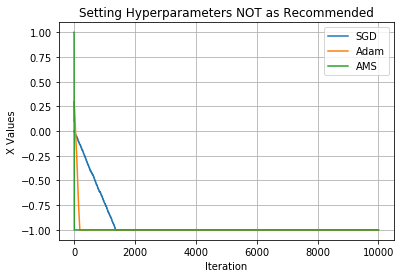

In [38]:
plt.plot(sgd_x_list_rand_good, label='SGD')
plt.plot(adam_x_list_rand_good, label='Adam')
plt.plot(ams_x_list_rand_good, label='AMS')
plt.xlabel('Iteration')
plt.ylabel('X Values')
plt.legend()
plt.title('Setting Hyperparameters NOT as Recommended')
plt.grid(True)